# Data Cleaning

#### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

#### 2. Import Data

In [2]:
data = pd.read_excel('regression_data.xlsx', engine='openpyxl')

#### 3. Exploring the Data

In [3]:
data.shape

(21597, 21)

In [4]:
data.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


- Mirar NaNs y eliminarlos:

In [5]:
round(data.isna().sum()/len(data),4)*100

id               0.0
date             0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
price            0.0
dtype: float64

*No hay NaNs*

- Eliminar columnas "no importantes":

In [6]:
data.drop(['lat', 'long'], axis=1, inplace=True)

In [7]:
data.shape

(21597, 19)

In [8]:
data.head(0)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price


*Hemos eliminado las columnas "lat" y "long" porque no las hemos considerado esenciales para el modelo, ya que con el zipcode sabemos el barrio/la zona de la ciudad donde está la vivienda.*

- Eliminar duplicados:

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(21597, 19)

- Comprobar que la columna "date" es correcta:

In [11]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [12]:
data.head(3)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000


- Mirar valores únicos de las columnas:

In [13]:
for c in data.columns.tolist():
    print(c, len(data[c].unique()))

id 21420
date 372
bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 306
yr_built 116
yr_renovated 70
zipcode 70
sqft_living15 777
sqft_lot15 8682
price 3622


In [14]:
data.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [15]:
data['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

*Vemos que los valores únicos de la columna" view" se refieren a categorías en función de las vistas que hay desde las viviendas: desde mala (0) hasta excelente (4).*

- Ver valores únicos de la columna "floors":

In [16]:
data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

- Ver valores únicos de la columna "bathrooms":

In [17]:
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

#### 4. Treating Numerical and Categorical Data

In [18]:
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

- Date Treatment: separar día, mes, año para trabajar con la fecha como número:

In [19]:
import datetime

In [20]:
def transformar_fecha(data):
    data['Year'] = data['date'].dt.year
    return data.drop(['date'], axis=1)

In [21]:
data = transformar_fecha(data)

In [22]:
data.dtypes

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
price              int64
Year               int64
dtype: object

*Fecha cambiada: tratada como número en vez de fecha.*

#### 5. Processing Data

Lesson 1.08 (final Lab) y 3.08

- Gráficos:

Representación gráfica de las variables para comprobar los outliers

1. Boxplots:

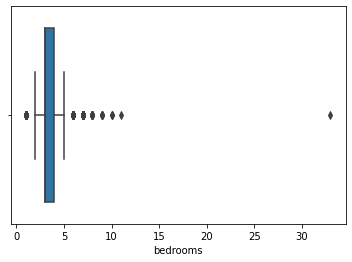

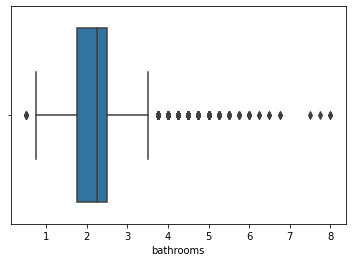

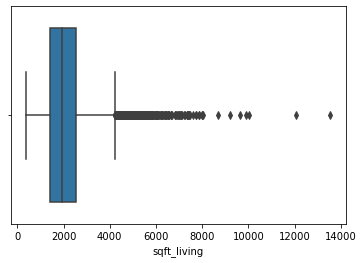

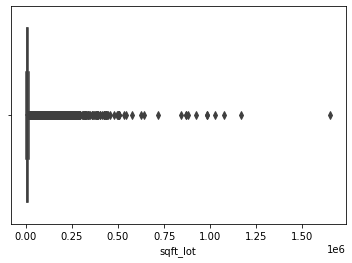

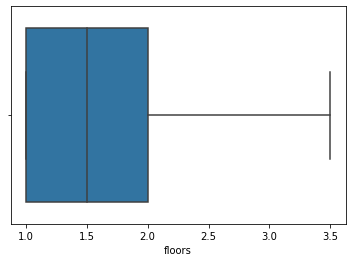

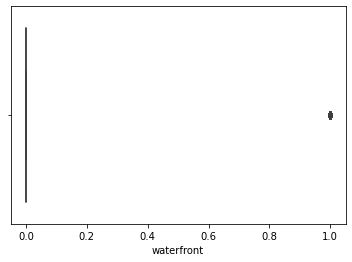

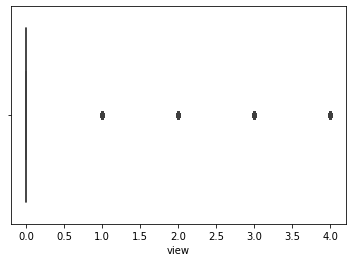

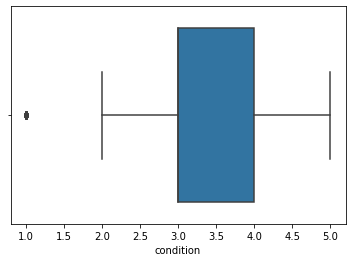

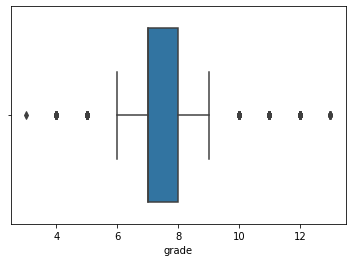

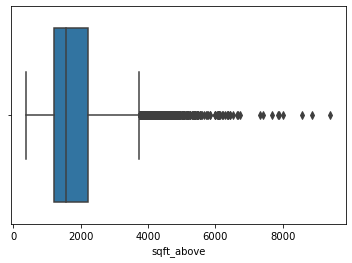

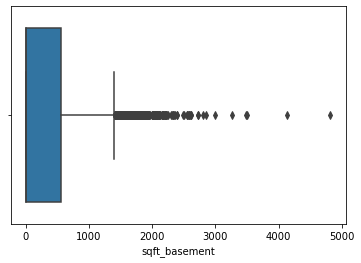

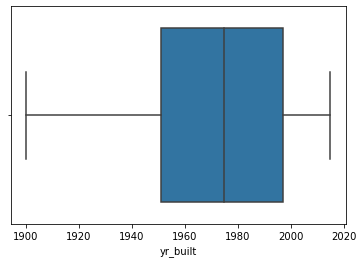

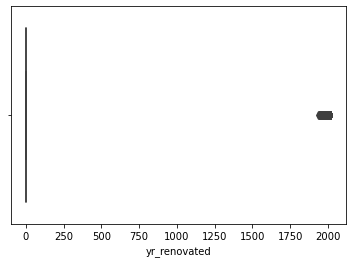

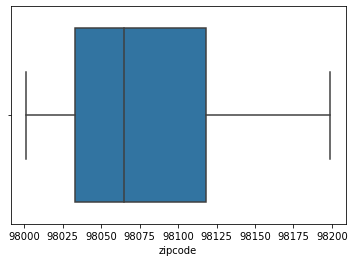

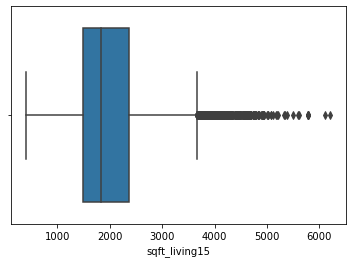

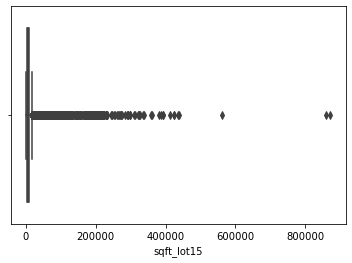

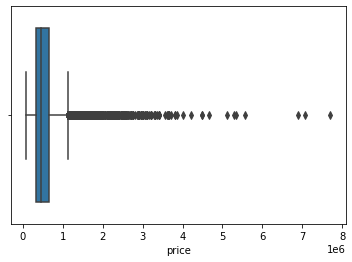

In [23]:
sns.boxplot(x=data['bedrooms'])
plt.show()

sns.boxplot(x=data['bathrooms'])
plt.show()

sns.boxplot(x=data['sqft_living'])
plt.show()

sns.boxplot(x=data['sqft_lot'])
plt.show()

sns.boxplot(x=data['floors'])
plt.show()

sns.boxplot(x=data['waterfront'])
plt.show()

sns.boxplot(x=data['view'])
plt.show()

sns.boxplot(x=data['condition'])
plt.show()

sns.boxplot(x=data['grade'])
plt.show()

sns.boxplot(x=data['sqft_above'])
plt.show()

sns.boxplot(x=data['sqft_basement'])
plt.show()

sns.boxplot(x=data['yr_built'])
plt.show()

sns.boxplot(x=data['yr_renovated'])
plt.show()

sns.boxplot(x=data['zipcode'])
plt.show()

sns.boxplot(x=data['sqft_living15'])
plt.show()

sns.boxplot(x=data['sqft_lot15'])
plt.show()

sns.boxplot(x=data['price'])
plt.show()

2. Distplots:

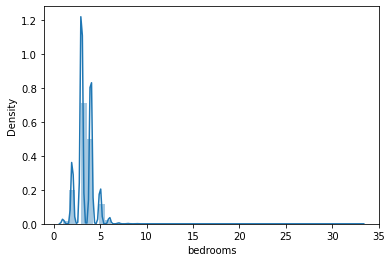

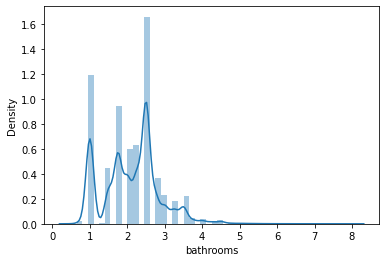

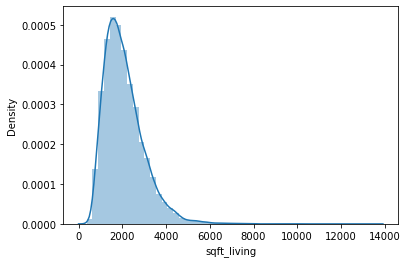

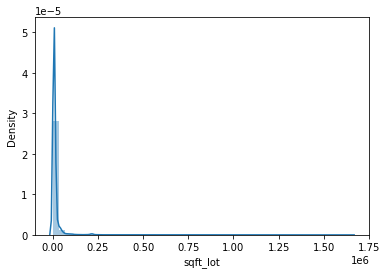

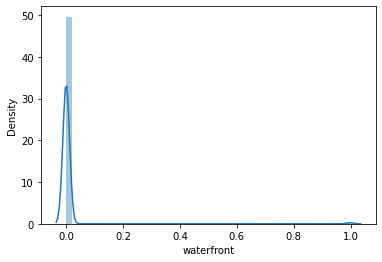

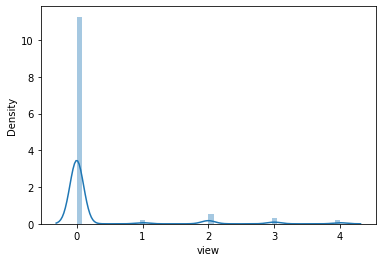

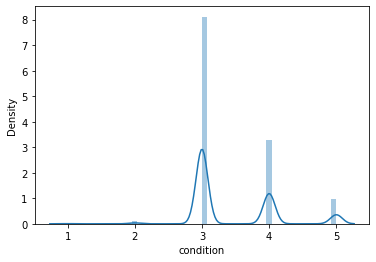

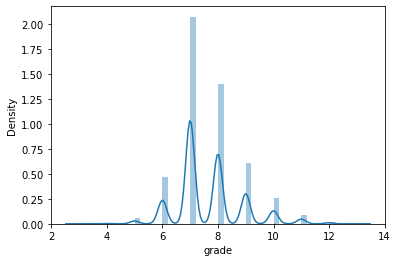

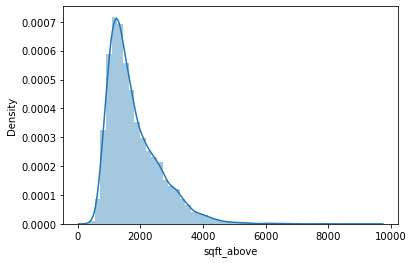

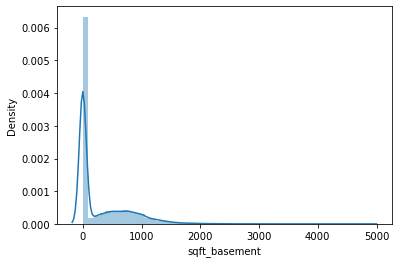

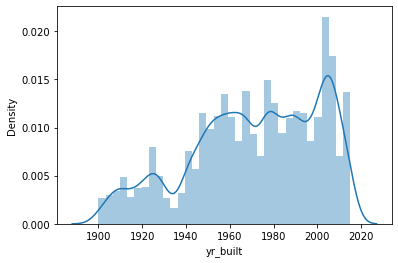

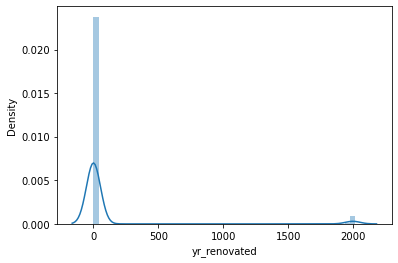

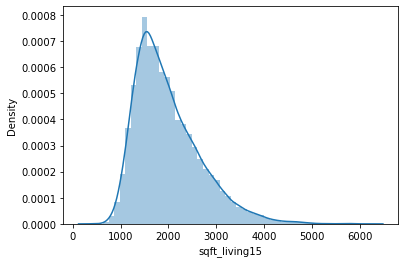

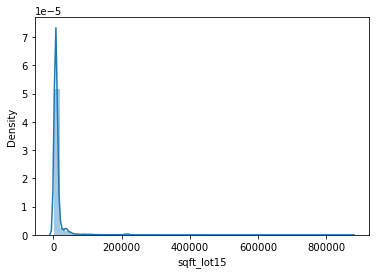

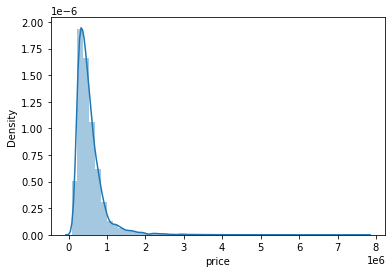

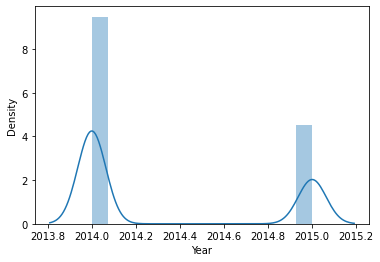

In [24]:
sns.distplot(data['bedrooms'])
plt.show()

sns.distplot(data['bathrooms'])
plt.show()

sns.distplot(data['sqft_living'])
plt.show()

sns.distplot(data['sqft_lot'])
plt.show()

sns.distplot(data['waterfront'])
plt.show()

sns.distplot(data['view'])
plt.show()

sns.distplot(data['condition'])
plt.show()

sns.distplot(data['grade'])
plt.show()

sns.distplot(data['sqft_above'])
plt.show()

sns.distplot(data['sqft_basement'])
plt.show()

sns.distplot(data['yr_built'])
plt.show()

sns.distplot(data['yr_renovated'])
plt.show()

sns.distplot(data['sqft_living15'])
plt.show()

sns.distplot(data['sqft_lot15'])
plt.show()

sns.distplot(data['price'])
plt.show()

sns.distplot(data['Year'])
plt.show()

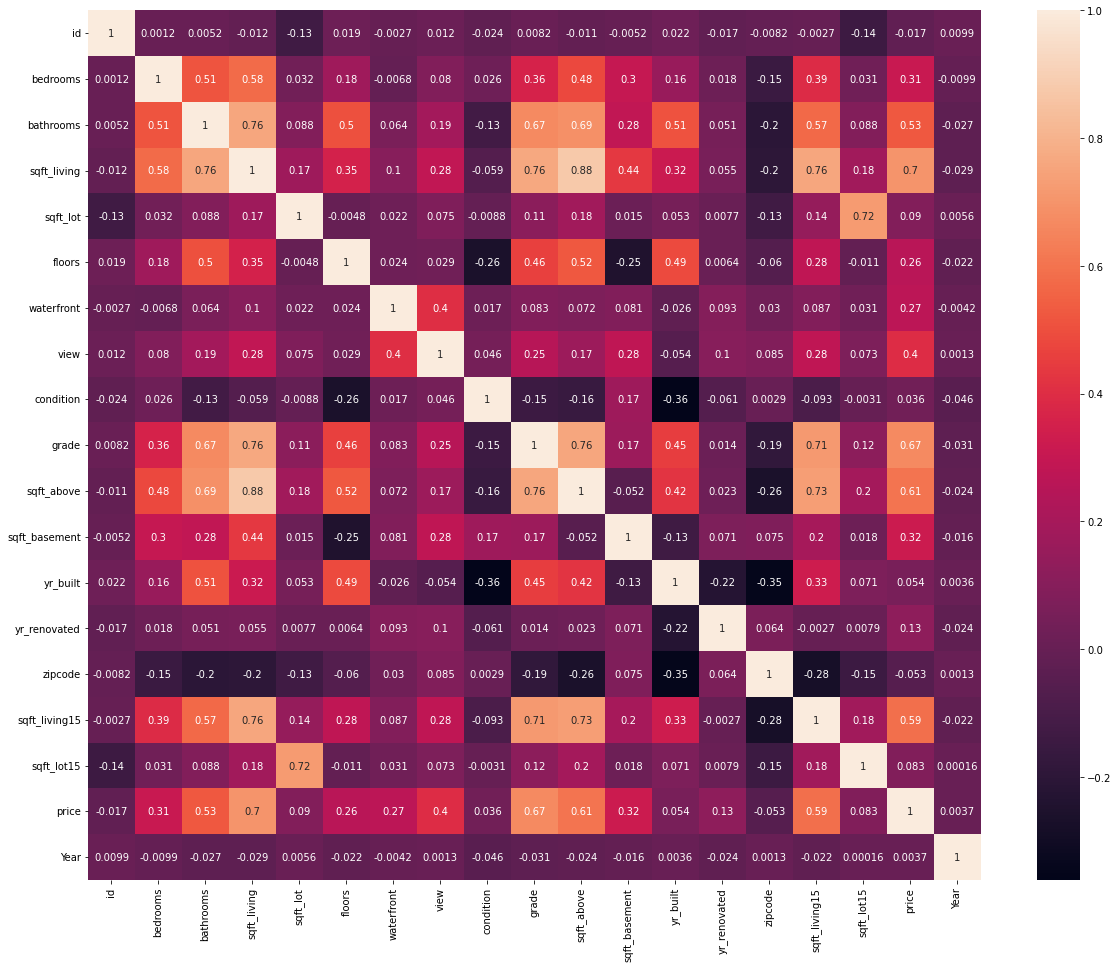

In [25]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

- Variables categóricas a "object":

In [26]:
data.waterfront = data.waterfront.astype('object')
data.view = data.view.astype('object')
data.condition = data.condition.astype('object')
data.grade = data.grade.astype('object')

In [27]:
cat_cols = data.select_dtypes(object).columns
cat_cols

Index(['waterfront', 'view', 'condition', 'grade'], dtype='object')

In [28]:
one_hot_data = pd.get_dummies(data[cat_cols], drop_first=True)
one_hot_data.head(2)

,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [29]:
data = pd.concat([data, one_hot_data], axis=1)   
data.drop(columns=cat_cols, inplace=True)

In [30]:
data.head(5)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,Year,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,3,1.00,1180,5650,1.0,1180,0,1955,0,98178,1340,5650,221900,2014,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,6414100192,3,2.25,2570,7242,2.0,2170,400,1951,1991,98125,1690,7639,538000,2014,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,5631500400,2,1.00,770,10000,1.0,770,0,1933,0,98028,2720,8062,180000,2015,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,2487200875,4,3.00,1960,5000,1.0,1050,910,1965,0,98136,1360,5000,604000,2014,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1954400510,3,2.00,1680,8080,1.0,1680,0,1987,0,98074,1800,7503,510000,2015,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
data.shape

(21597, 34)

- Tratar outliers:

#### 6. Regresión Linear

- Train-test split:

In [32]:
Y = data['price']
data = data.drop(['price'], axis=1)
X_num = data.select_dtypes(include = np.number)
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(21597, 33)


In [33]:
from sklearn.model_selection import train_test_split as tts

In [34]:
X_train, X_test, y_train, y_test = tts(X_num, Y, test_size=0.2, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
standard = StandardScaler()
X_train_scaled = standard.fit_transform(X_train)
X_test_scaled = standard.fit_transform(X_test)

- Aplicar regresión linear:

*Comprobar resultados de X e Y:*

In [37]:
Y.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [38]:
X_num.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Year,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,291.725008,1970.999676,84.464787,98077.951845,1986.620318,12758.283512,2014.322962,0.007547,0.015373,0.044497,0.023614,0.014771,0.007871,0.649164,0.262861,0.078761,0.001250,0.011205,0.094365,0.415521,0.280826,0.121082,0.052507,0.018475,0.004121,0.000602
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,442.667800,29.375234,401.821438,53.513072,685.230472,27274.441950,0.467619,0.086549,0.123032,0.206201,0.151848,0.120636,0.088373,0.477243,0.440198,0.269372,0.035337,0.105263,0.292343,0.492823,0.449413,0.326230,0.223053,0.134664,0.064064,0.024528
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*Regresión Linear:*

In [39]:
from sklearn.linear_model import LinearRegression as LinReg
linreg = LinReg()    
linreg.fit(X_train, y_train)   
y_pred_linreg=linreg.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error

In [41]:
mean_absolute_error(y_test, y_pred_linreg)

137184.19884168828

In [44]:
R2 = linreg.score(X_test, y_test)
R2

0.6452322023733317

#### 7. Validación Modelo

- R2.

- MSE.

- RMSE.

- MAE.